<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%A0%94%E7%A9%B6agent%E8%A1%8C%E7%82%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#agent
class agent:
  def __init__(self,model,greddy=0.9):
    self.model = model
    self.greddy = greddy
  def choose_action(self,state):
    n = np.random.uniform(0,1)
    if n>self.greddy:#10% chance
      print('random action')
      return np.random.uniform(0,1,size=(1,2))
    else:#90% chance
      print('greddy action')
      one_hot_action = self.model.predict(state)
    return one_hot_action
  def learn(self,state,one_hot_action):
    self.model.fit(state,one_hot_action,epochs=3,verbose=0)

In [2]:
#keras model
from keras.models import Model
from keras.layers import Input, Dense ,Convolution2D
def bulid_model(state_dim,action_num):
  a = Input(shape=state_dim)
  b = Dense(8,activation='elu')(a)
  c = Dense(4,activation='elu')(b)
  d = Dense(action_num,activation='linear')(c)
  model = Model(inputs=a, outputs=d)
  model.compile(optimizer='adam',loss='mse')
  print(model.summary())
  return model

Using TensorFlow backend.


In [0]:
#env
class env:
  def __init__(self,space_len):
    self.space_len = space_len
    self.space = np.zeros((space_len))
    self.x = 0
    self.T = space_len-1
    self.space[self.x]=1
    self.space[self.T]=2
    self.action = [0,1]#left,right
  
  def reset(self):
    self.space = np.zeros((self.space_len))
    self.x = 0
    self.T = self.space_len-1
    self.space[self.x]=1
    self.space[self.T]=2
    return self.space
  
  def render(self):
    print(str(self.space).replace('0.','-').replace('1.','O').replace('2.','$'))
  def step(self,action):
    #update x
    if (action == 1)&(self.x<self.T):
      self.x +=1
    if (action == 0)&(self.x>0):
      self.x -=1
    #use x update space
    self.space = np.zeros((self.space_len))
    self.space[self.x] = 1
    self.space[self.T] = 2
    #reward
    if self.x == self.T:
      reward = 100
    else:
      reward = 0
    #done
    if reward == 100:
      done = True
    else:
      done = False
    return self.space,reward,done    

# 主循環

In [0]:
def main(env,agent,gamma=0.9):
    logs = {}
    for episode in range(100):
        state = env.reset()
        total_step = 0
        while True:
            env.render()
            action = agent.choose_action(np.array([state]))
            state_, reward, done = env.step(np.argmax(action))
            future_reward = np.max(agent.choose_action(np.array([state_])))
            new_Q = reward + gamma*(future_reward)
            one_hot_action = [0,0]
            one_hot_action[np.argmax(action)] = new_Q
            print(one_hot_action)
            agent.learn(np.array([state]),np.array([one_hot_action]))
            state = state_
            total_step += 1
            if done:
                break
        print('episode:{}total_step:{}'.format(episode,total_step))
        logs[episode]=total_step
    plt.plot(logs.keys(),logs.values())
    plt.show()

In [5]:
import numpy as np
e = env(10)
e.render()

[O - - - - - - - - $]


In [6]:
model = bulid_model((10,),2)
exia = agent(model)

W0905 05:16:45.562291 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 05:16:45.584699 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 05:16:45.590209 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 05:16:45.629566 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________
None


W0905 05:16:45.670380 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3005: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0905 05:16:45.674036 140662520907648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



[O - - - - - - - - $]
random action
greddy action
[0.3027000278234482, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.3056863456964493, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.2982828050851822, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.28504693508148193, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.2651840776205063, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.24058392941951753, 0]
[O - - - - - - - - $]
greddy action
random action
[0.572371549612838, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.2530218154191971, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.29120201468467716, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.3114784419536591, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.3181120276451111, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.3147463917732239, 0]
[O - - - - - - - - $]
greddy action
greddy action
[0.3044136375188828, 0]
[O - - - - - - - - $]
greddy action


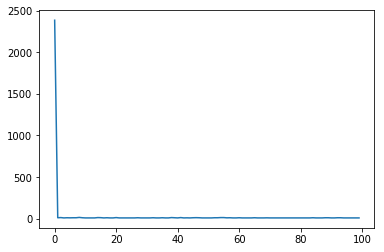

In [7]:
import matplotlib.pyplot as plt
main(e,exia)